## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('all', download_dir='nltk_data/')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to nltk_data/...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to nltk_data/...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     nltk_data/...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     nltk_data/...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     nltk_data/...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |   

True

In [2]:
nltk.data.path.append('nltk_data/')
nltk.data.path

['C:\\Users\\egorn/nltk_data',
 's:\\Data\\Coding\\LLM-Projects\\venv\\nltk_data',
 's:\\Data\\Coding\\LLM-Projects\\venv\\share\\nltk_data',
 's:\\Data\\Coding\\LLM-Projects\\venv\\lib\\nltk_data',
 'C:\\Users\\egorn\\AppData\\Roaming\\nltk_data',
 'C:\\nltk_data',
 'D:\\nltk_data',
 'E:\\nltk_data',
 'nltk_data/']

## Read dataset

In [4]:
df = pd.read_csv('Reviews.csv')
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


In [5]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
df.shape

(92747, 10)

In [7]:
df = df.head(10000)
df.shape

(10000, 10)

## Quick EDA

Text(0.5, 0, 'Review Stars')

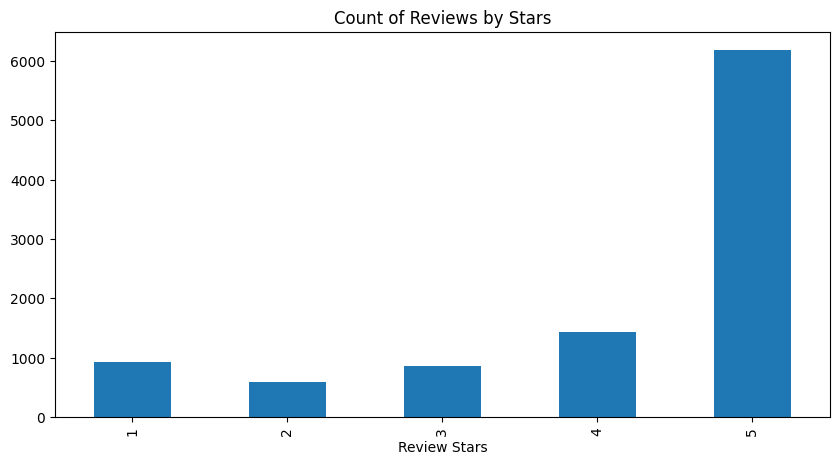

In [8]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))
ax.set_xlabel('Review Stars')

## Basic NLTK

In [9]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [10]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [12]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## VADER

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

In [14]:
sia = SentimentIntensityAnalyzer()

In [15]:
sia.polarity_scores("I'm so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [16]:
sia.polarity_scores("This is the worst thing ever.")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [17]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [18]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 10000/10000 [00:03<00:00, 2987.49it/s]


In [19]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [20]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plot VADER results

Text(0.5, 1.0, 'Compound Score by Amazon Star Review')

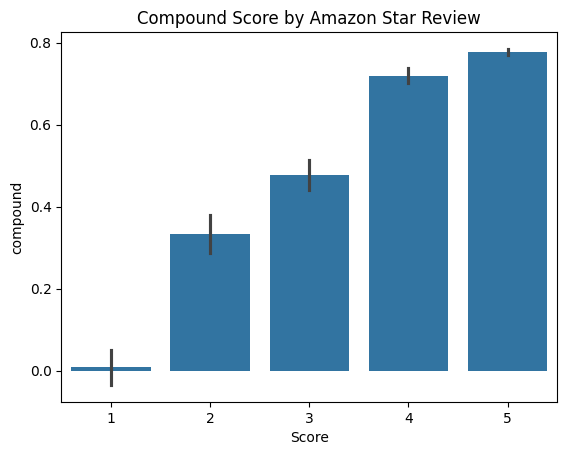

In [21]:
ax = sns.barplot(vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')

Text(0.5, 1.0, 'Negative')

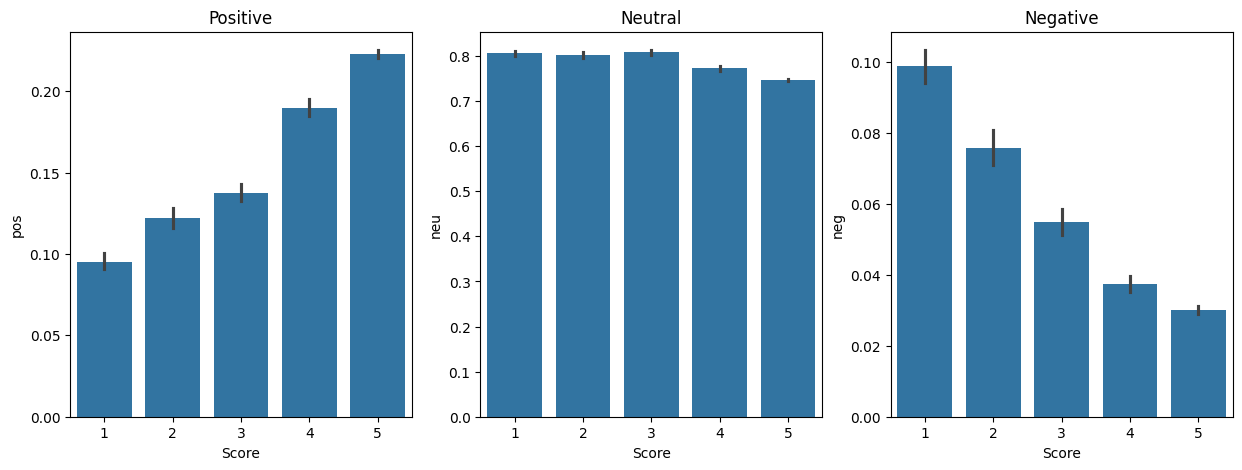

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

In [23]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

s:\Data\Coding\LLM-Projects\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

s:\Data\Coding\LLM-Projects\venv\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\egorn\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [25]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [26]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2],
}
scores_dict

{'roberta_neg': np.float32(0.97635514),
 'roberta_neu': np.float32(0.020687465),
 'roberta_pos': np.float32(0.0029573678)}

In [27]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2],
    }
    return scores_dict

In [28]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f'vader_{key}'] = value
        roberta_result = polarity_scores_roberta(text)
        res[myid] = {**vader_result_rename, **roberta_result}
    except RuntimeError:
        print(f'Broke for id {myid}')

  1%|          | 85/10000 [00:04<07:43, 21.38it/s]

Broke for id 83


  2%|▏         | 189/10000 [00:10<07:39, 21.37it/s]

Broke for id 187


  5%|▌         | 531/10000 [00:30<09:48, 16.09it/s]

Broke for id 529


  5%|▌         | 542/10000 [00:30<07:26, 21.18it/s]

Broke for id 540


  7%|▋         | 747/10000 [00:44<10:03, 15.34it/s]

Broke for id 746


  9%|▊         | 863/10000 [00:51<09:03, 16.80it/s]

Broke for id 863


 11%|█         | 1055/10000 [01:03<07:52, 18.94it/s]

Broke for id 1053


 11%|█         | 1073/10000 [01:04<07:11, 20.70it/s]

Broke for id 1070


 12%|█▏        | 1159/10000 [01:09<06:35, 22.35it/s]

Broke for id 1156


 13%|█▎        | 1324/10000 [01:19<08:24, 17.20it/s]

Broke for id 1321


 14%|█▍        | 1377/10000 [01:22<09:44, 14.76it/s]

Broke for id 1375


 15%|█▍        | 1499/10000 [01:29<08:34, 16.52it/s]

Broke for id 1498


 16%|█▌        | 1576/10000 [01:34<10:04, 13.95it/s]

Broke for id 1575


 18%|█▊        | 1801/10000 [01:46<04:51, 28.16it/s]

Broke for id 1796


 18%|█▊        | 1828/10000 [01:48<08:09, 16.69it/s]

Broke for id 1826


 22%|██▏       | 2171/10000 [02:09<07:57, 16.38it/s]

Broke for id 2169


 22%|██▏       | 2249/10000 [02:13<06:47, 19.00it/s]

Broke for id 2248


 25%|██▍       | 2477/10000 [02:26<06:41, 18.73it/s]

Broke for id 2476


 25%|██▍       | 2495/10000 [02:28<08:05, 15.45it/s]

Broke for id 2492


 26%|██▌       | 2587/10000 [02:33<05:36, 22.05it/s]

Broke for id 2584


 26%|██▌       | 2611/10000 [02:34<06:33, 18.80it/s]

Broke for id 2610


 29%|██▉       | 2901/10000 [02:51<05:16, 22.46it/s]

Broke for id 2897
Broke for id 2898
Broke for id 2902


 29%|██▉       | 2932/10000 [02:53<05:45, 20.46it/s]

Broke for id 2928


 29%|██▉       | 2945/10000 [02:53<05:43, 20.56it/s]

Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948


 30%|███       | 3026/10000 [02:58<05:42, 20.36it/s]

Broke for id 3022
Broke for id 3023
Broke for id 3025


 33%|███▎      | 3306/10000 [03:13<04:33, 24.48it/s]

Broke for id 3306


 38%|███▊      | 3790/10000 [03:39<05:14, 19.74it/s]

Broke for id 3788


 40%|███▉      | 3972/10000 [03:49<04:58, 20.16it/s]

Broke for id 3969


 41%|████      | 4109/10000 [03:58<05:46, 17.00it/s]

Broke for id 4107
Broke for id 4110


 43%|████▎     | 4309/10000 [04:11<05:44, 16.51it/s]

Broke for id 4307


 43%|████▎     | 4319/10000 [04:11<06:04, 15.59it/s]

Broke for id 4316


 44%|████▍     | 4411/10000 [04:16<04:17, 21.71it/s]

Broke for id 4408


 45%|████▍     | 4486/10000 [04:20<04:03, 22.66it/s]

Broke for id 4483


 45%|████▌     | 4513/10000 [04:22<05:43, 15.99it/s]

Broke for id 4512


 46%|████▌     | 4555/10000 [04:25<05:10, 17.53it/s]

Broke for id 4553


 46%|████▌     | 4583/10000 [04:28<08:17, 10.89it/s]

Broke for id 4583


 50%|█████     | 5044/10000 [04:56<04:10, 19.79it/s]

Broke for id 5040


 52%|█████▏    | 5183/10000 [05:05<04:08, 19.35it/s]

Broke for id 5182


 52%|█████▏    | 5193/10000 [05:05<05:22, 14.90it/s]

Broke for id 5192


 54%|█████▎    | 5370/10000 [05:15<03:28, 22.21it/s]

Broke for id 5365


 54%|█████▍    | 5443/10000 [05:21<04:46, 15.93it/s]

Broke for id 5442


 57%|█████▋    | 5710/10000 [05:37<03:44, 19.10it/s]

Broke for id 5709


 60%|██████    | 6000/10000 [05:54<03:08, 21.26it/s]

Broke for id 5998


 60%|██████    | 6003/10000 [05:54<03:38, 18.27it/s]

Broke for id 6003


 60%|██████    | 6009/10000 [05:54<03:49, 17.43it/s]

Broke for id 6007


 61%|██████    | 6109/10000 [06:00<03:19, 19.47it/s]

Broke for id 6106


 62%|██████▏   | 6237/10000 [06:07<03:29, 17.96it/s]

Broke for id 6234


 66%|██████▌   | 6560/10000 [06:27<03:20, 17.16it/s]

Broke for id 6558


 67%|██████▋   | 6652/10000 [06:33<04:53, 11.39it/s]

Broke for id 6651


 68%|██████▊   | 6801/10000 [06:46<03:38, 14.64it/s]

Broke for id 6798


 68%|██████▊   | 6839/10000 [06:49<04:03, 13.00it/s]

Broke for id 6838


 68%|██████▊   | 6849/10000 [06:50<05:21,  9.80it/s]

Broke for id 6850


 69%|██████▉   | 6888/10000 [06:53<02:48, 18.51it/s]

Broke for id 6886


 69%|██████▉   | 6907/10000 [06:54<03:53, 13.23it/s]

Broke for id 6905


 70%|██████▉   | 6956/10000 [06:58<02:57, 17.14it/s]

Broke for id 6955


 71%|███████   | 7078/10000 [07:05<02:59, 16.32it/s]

Broke for id 7077


 71%|███████   | 7089/10000 [07:05<03:04, 15.76it/s]

Broke for id 7088


 72%|███████▏  | 7202/10000 [07:12<02:25, 19.29it/s]

Broke for id 7201


 76%|███████▌  | 7606/10000 [07:35<02:03, 19.37it/s]

Broke for id 7604
Broke for id 7608


 77%|███████▋  | 7673/10000 [07:39<02:09, 18.01it/s]

Broke for id 7671


 77%|███████▋  | 7704/10000 [07:41<02:31, 15.12it/s]

Broke for id 7701


 78%|███████▊  | 7812/10000 [07:48<01:52, 19.41it/s]

Broke for id 7810


 79%|███████▉  | 7910/10000 [07:53<02:26, 14.31it/s]

Broke for id 7907


 81%|████████  | 8078/10000 [08:04<01:41, 18.95it/s]

Broke for id 8077


 81%|████████▏ | 8132/10000 [08:07<01:29, 20.84it/s]

Broke for id 8131


 83%|████████▎ | 8268/10000 [08:15<01:38, 17.52it/s]

Broke for id 8266


 87%|████████▋ | 8741/10000 [08:41<01:14, 16.94it/s]

Broke for id 8740


 88%|████████▊ | 8759/10000 [08:42<01:08, 18.01it/s]

Broke for id 8757


 89%|████████▉ | 8939/10000 [08:53<00:45, 23.53it/s]

Broke for id 8935


 96%|█████████▌| 9593/10000 [09:28<00:24, 16.92it/s]

Broke for id 9590


 99%|█████████▊| 9853/10000 [09:46<00:09, 15.41it/s]

Broke for id 9850


 99%|█████████▉| 9882/10000 [09:47<00:06, 18.78it/s]

Broke for id 9881


 99%|█████████▉| 9912/10000 [09:49<00:06, 13.42it/s]

Broke for id 9910


 99%|█████████▉| 9925/10000 [09:50<00:05, 13.38it/s]

Broke for id 9923


100%|██████████| 10000/10000 [09:55<00:00, 16.79it/s]


In [29]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [30]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

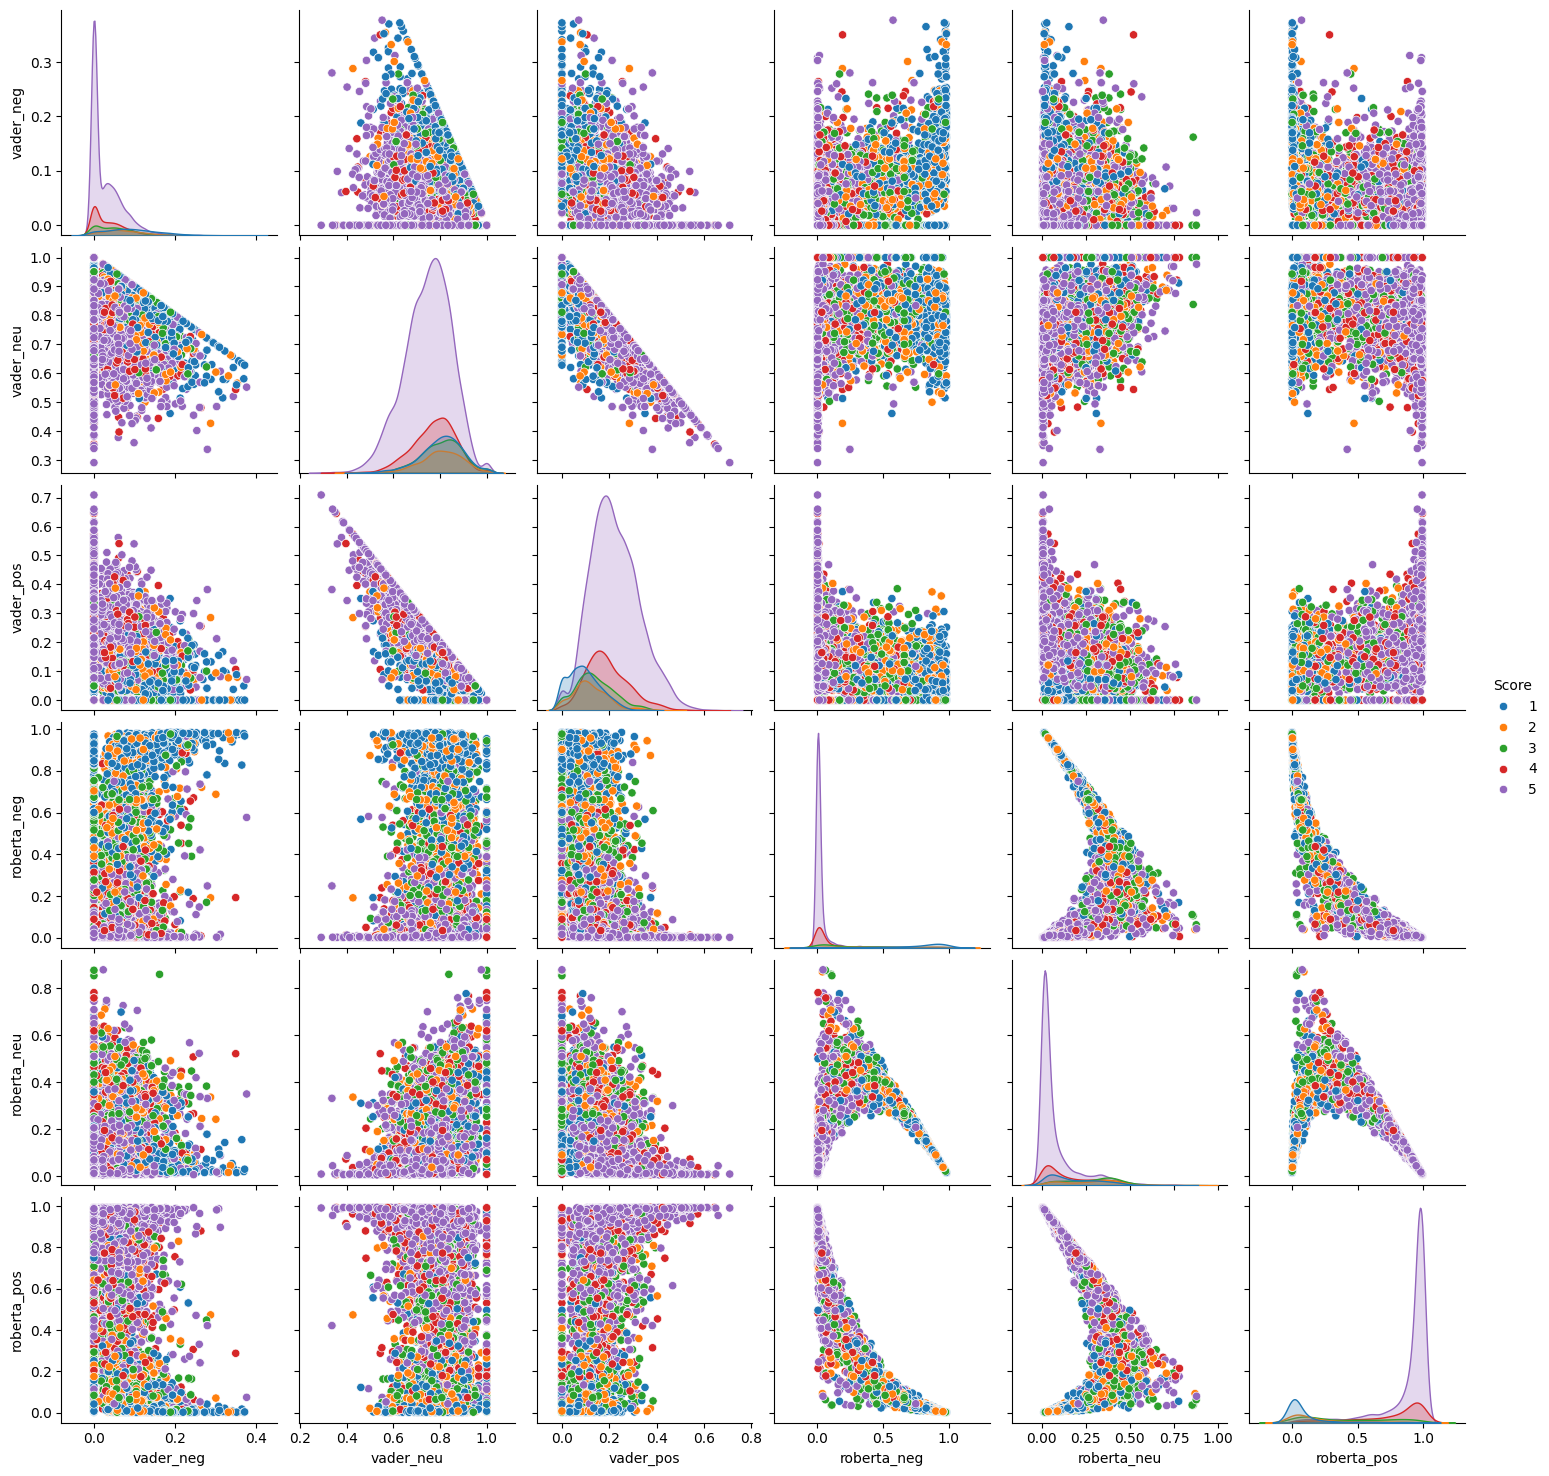

In [31]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()